> # 7 텍스트 데이터 다루기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## 7.1 문자열 데이터 타입

- 텍스트는 보통 데이터셋 문자열
- 모든 문자열 특성을 텍스트로 다뤄야 하는 것은 아님
- 문자열 데이터의 종류
    - ① 범주형 데이터
        - "빨강", "녹색", "파랑"
    - ② 범주에 의미를 연결시킬 수 있는 임의의 문자열
        - "회색", "쥐색", "치과 오렌지색"
    - ③ 구조화된 문자열 데이터
        - 장소, 사람 이름, 날자, 전화번호
    - ④ 텍스트 데이터
        - 절과 문장으로 구성, 트윗, 채팅, 리뷰, 작품 속의 글, 문서


- 텍스트 분석에서의 데이터셋: 말뭉치(corpus)
- 하나의 텍스트를 의미하는 각 데이터 포인트: 문서(document)

## 7.2 예제 애플리케이션: 영화 리뷰 감성 분석

- 스탠퍼드 대학교 연구원 Andrew Mass의 IMDb에서 수집한 영화 리뷰 데이터셋 사용

In [13]:
# !은 셸 명령을 실행해주는 IPython의 매직 명령어
# tree 명령이 없다면 find ./data - type d 명령을 사용해 하위 폴더의 목록을 봄
# !tree -dL 2 data/aclImdb
# rm -r data/aclImdb/train/unsup

In [14]:
from sklearn.datasets import load_files

reviews_train = load_files("D:/aclImdb/train/")

In [15]:
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입: {}".format(type(text_train)))
print("text_train의 길이: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [16]:
# 줄바꿈 태그 삭제
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [17]:
print("클래스별 샘플 수 (훈련 데이터): {}".format(np.bincount(y_train)))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [18]:
# 같은 방식으로 테스트 데이터셋 읽어 들임
reviews_test = load_files("D:/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수: {}".format(len(text_test)))
print("클래스별 샘플 수 (테스트 데이터): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


- 리뷰가 주어졌을 때 텍스트 내용을 보고, '양성', '음성' 구분

## 7.3 텍스트 데이터를 BOW로 표현하기

- BOW(bag of words)
- 가장 간단하고 효과적이면서 널리 쓰이는 방법
- 텍스트의 구조 대부분을 잃고 말뭉치에 각 단어의 출현 빈도만 헤아림
- BOW 표현의 단계
    - ① 토큰화(tokenization): 각 문서를 문서에 포함된 단어로 나눔(공백 같은 기준)
    - ② 어휘 사전 구축: 모든 문서에 나타난 단어의 어휘를 모으고 번호를 매김
    - ③ 인코딩: 어휘 사전의 단어가 문서마다 몇 번이나 나타났는지를 헤아림

### 7.3.1 샘플 데이터에 BOW 적용하기

In [19]:
bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- CountVectorizer의 fit 메서드는 훈련 데이터를 토큰으로 나누고 어휘사전을 구축한다.

In [21]:
print("어휘 사전의 크기: {}".format(len(vect.vocabulary_)))
print("어휘 사전의 내용:\n {}".format(vect.vocabulary_))

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [22]:
bag_of_words = vect.transform(bards_words)
print("BOW: {}".format(repr(bag_of_words)))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


- 메모리 낭비를 피하기 위해 0이 아닌 값만 저장하는 SciPy 희소 행렬로 저장

In [24]:
print("BOW의 밀집 표현:\n{}".format(bag_of_words.toarray()))

BOW의 밀집 표현:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


- 희소 행렬의 실제 내용을 보려면 toarray 메서드 사용

### 7.3.2 영화 리뷰에 대한 BOW

In [26]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [27]:
feature_names = vect.get_feature_names()
print("특성 개수: {}".format(len(feature_names)))
print("처음 20개 특성:\n{}".format(feature_names[:20]))
print("20,010에서 20,030까지 특성:\n{}".format(feature_names[20010:20030]))
print("매 2,000번째 특성:\n{}".format(feature_names[::2000]))

특성 개수: 74849
처음 20개 특성:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20,010에서 20,030까지 특성:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2,000번째 특성:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


#### 교차 검증을 사용해 LogisticRegression 모델의 성능 평가

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("교차 검증 평균 점수: {:.2f}".format(np.mean(scores)))

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


교차 검증 평균 점수: 0.88


In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수: 0.89
최적의 매개변수:  {'C': 0.1}


In [31]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


#### 단어 추출 방법의 개선

- 정규표현식 "\b\w\w+\b" 사용
- \b 경계 구분, 적어도 둘 이상의 문자나 숫자 \w가 연속된 단어를 찾음
- min_df 매개변수로 토큰이 나타날 최소 문서 개수를 지정
- 특성의 수를 줄일 수 있음(희귀한 단어와 철자가 틀린 단어들이 사라짐)

In [33]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train: {}".format(repr(X_train)))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [34]:
feature_names = vect.get_feature_names()

print("처음 50개 특성:\n{}".format(feature_names[:50]))
print("20,010부터 20,030까지 특성:\n{}".format(feature_names[20010:20030]))
print("매 700번째 특성:\n{}".format(feature_names[::700]))

처음 50개 특성:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20,010부터 20,030까지 특성:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient', 'r

In [35]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수: 0.89


- 검증 점수는 높아지지 않았지만 처리 속도가 빨라지고 모델 이해가 쉬워짐

#### CountVectorizer의 transform 메서드

- 훈련 데이터에 없던 단어가 포함된 문서에 적용하면
- 어휘 사전에 없기 때문에 그 단어를 무시함
- 스팸 감지 같은 애플리케이션
    - 어휘 사전에 없는 단어가 얼마나 많이 나타나는지를 기록한 특성이 유용할 수도

## 7.4 불용어

- 의미없는 단어를 제거하는 또 다른 방법은?
    - 너무 빈번하여 유용하지 않은 단어를 제외하는 것
        - 언어별 불용어(stopword) 목록을 사용
        - 너무 자주 나타나는 단어를 제외

In [37]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수: {}".format(len(ENGLISH_STOP_WORDS)))
print("매 10번째 불용어:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

불용어 개수: 318
매 10번째 불용어:
['empty', 'whither', 'nobody', 'ours', 'what', 'part', 'something', 'least', 'being', 'thru', 'neither', 'above', 'once', 'not', 'whoever', 'all', 'fifteen', 'indeed', 'so', 'per', 'though', 'any', 'done', 'its', 'by', 'through', 'made', 'forty', 'whose', 'who', 'within', 'must']


In [38]:
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있음
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n{}".format(repr(X_train)))

불용어가 제거된 X_train:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [39]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수: 0.88


- 크게 도움이 되는 것 같지는 않음
- 고정된 불용어 목록은 모델이 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서 도움이 됨

## 7.5 tf-idf로 데이터 스케일 변경하기

- 중요하지 않아 보이는 특서을 제외하는 대신 의미있는 특성인지 계산해서 스케일 조정
- 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치
- 문서 d에 있는 단어 w에 대한 tf-idf 점수는 아래와 같음

## <center>$tfidf(w, d) = tf(log(\frac{N + 1}{N_{w} + 1}) + 1)$</center>

    - N은 훈련 세트에 있는 문서의 개수
    - $N_{w}$는 단어 w가 나타난 훈련 세트 문서의 개수
    - tf(단어 빈도수)는 단어 w가 대상 문서 d에 나타난 횟수
    - 사이킷런의 tf-idf 클래스들은 모두 점수 계산 후 L2 정규화를 적용

#### 파이프라인을 사용해 그리드 서치 적용

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수: 0.89


In [43]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋 변환
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾음
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름을 구함
feature_names = np.array(vectorizer.get_feature_names())

print("tfidf가 가장 낮은 특성:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))

print("tfidf가 가장 높은 특성:\n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))

tfidf가 가장 낮은 특성:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
tfidf가 가장 높은 특성:
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [44]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("idf가 가장 낮은 특성:\n{}".format(
    feature_names[sorted_by_idf[:100]]))

idf가 가장 낮은 특성:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


## 7.6 모델 계수 조사

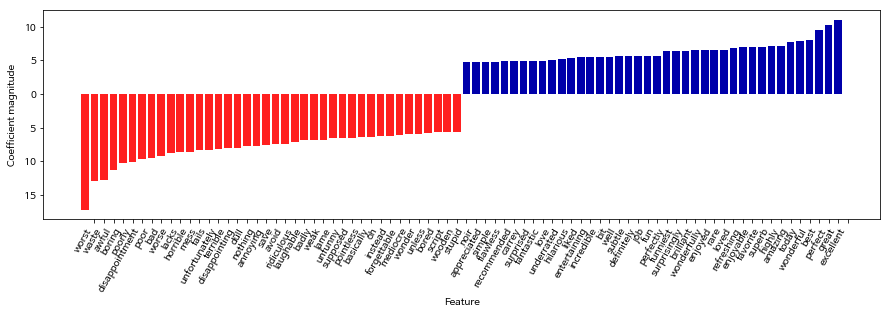

In [47]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)

## 7.7 여러 단어로 만든 BOW(n-그램)

- BOW 표현 방식은 단어의 순서가 완전히 무시된다는 큰 단점
- 두세 개의 토큰을 함께 고려하는 방식
- 바이그램, 트라이그램 등

In [49]:
# 토큰 하나인 유니그램
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [51]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:\n{}".format(cv.get_feature_names()))

어휘 사전 크기: 13
어휘 사전:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [52]:
# 바이그램
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:\n{}".format(cv.get_feature_names()))

어휘 사전 크기: 14
어휘 사전:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [53]:
print("변환된 데이터 (밀집 배열):\n{}".format(cv.transform(bards_words).toarray()))

변환된 데이터 (밀집 배열):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


- 많은 경우에 바이그램을 추가하면 도움이 됨
- 5-그램까지는 도움이 되지만 특성이 많아지며 과대적합될 가능성이 높아짐
- 이론상 바이그램의 수는 유니그램 수의 제곱

In [54]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:\n{}".format(cv.get_feature_names()))

어휘 사전 크기: 39
어휘 사전:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


#### 영화 리뷰 데이터에 TfidfVectorizer를 적용하고 그리드 서치

In [55]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n{}".format(grid.best_params_))

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수: 0.91
최적의 매개변수:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


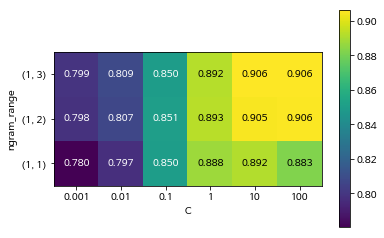

In [56]:
# 그리드 서치에서 테스트 점수를 추출
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그림
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

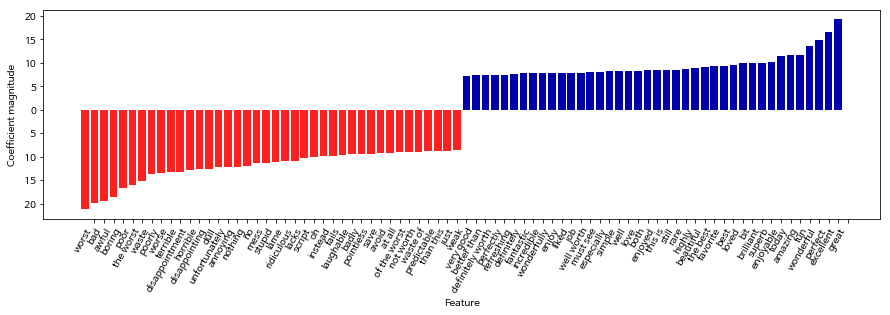

In [57]:
# 특성 이름과 계수를 추출
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

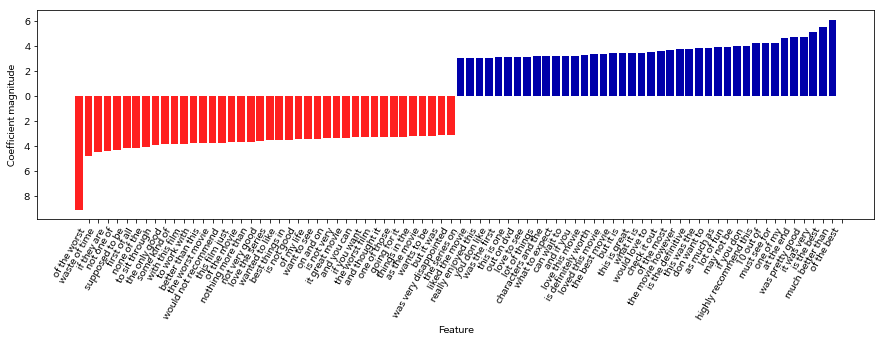

In [58]:
# 트라이그램 특성 찾음
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냄
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)

## 7.8 고급 토큰화, 어간 추출, 표제어 추출

- CountVectorizer와 TfidfVectorizer의 특성 추출은 비교적 단순
- 훨씬 정교한 방법도 있음
- "drawback", "drawbacks" / "replace", "replacement", "to replace"
- 위와 같은 단어들을 구분하게 되면 과대적합되기 쉬움
- 같은 어간을 가진 모든 단어를 구분해야 함(합치거나)
- 일일이 어미를 찾아 제외하는 규칙 기반 방식 -> **어간 추출**
- 문장에서 단어의 역할을 고려하는 처리 방식 -> **표제어 추출**
- 단어의 표준 형태 -> **표제어**
- 표제어 추출과 어간 추출은 단어의 일반 형태를 추출하는 정규화의 형태 

In [67]:
import spacy # 표제어 추출
import nltk # 포터 어간 추출기

# spacy 'en' 모델 설치 문제 발생
# 관리자 권한으로 명령 프롬프트 실행
# python -m spacy download en

# 추가: python -m spacy download en_core_web_md
# - lager Enlish model (~1GB)

# spacy의 영어 모델 로드
en_nlp = spacy.load('en')
# nltk의 PorterStemmer 객체
stemmer = nltk.stem.PorterStemmer()

# spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수
def compare_normalization(doc):
    # spacy로 문서를 토큰화
    doc_spacy = en_nlp(doc)
    # spacy로 찾은 표제어를 출력
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    # PorterStemmer로 찾은 토큰을 출력
    print("어간:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [72]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

표제어:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


- 어간 추출에서는 "was"가 "wa"가 되지만
- 표제어 추출에서는 "be"를 추출
- 일반적으로 표제어 추출이 머신러닝을 위한 토큰 정규화에서 좋은 결과

#### CountVectorizer에서 tokenizer 매개변수로 문서 토큰화 방법 지정

- 사이킷런에는 앞의 두개의 토큰 정규화 방법이 구현되어 있지 않지만, 따로 지정 가능

In [83]:
# CountVectorizer의 정규표현식 기반 토큰 분할기를 사용
# spacy에서 표제어 추출 기능을 이용
# en_nlp.tokenizer를 정규표현식 기반의 토큰 분할기로 바꿈

import re
# CountVectorizer에서 사용되는 정규표현식
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# spacy의 언어 모델을 로드하고 원본 토큰 분할기를 저장
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# 정규표현식을 사용한 토큰 분할기로 바꿈
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# spacy 문서 처리 파이프라인을 사용해 자작 토큰 분할기를 만듬
def custom_tokenizer(document):
    doc_spacy = en_nlp(document) # 인터페이스 변경, parse, entity를 지움
    return [token.lemma_ for token in doc_spacy]

# 자작 토큰 분할기를 사용해 CountVectorizer 객체를 생성
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [84]:
# 표제어 추출이 가능한 CountVectorizer 객체로 text_train을 변환
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# 비교를 위해 표준 CountVectorizer를 사용
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (25000, 21543)
X_train.shape: (25000, 27271)


- 출력 결과를 보면, 표제어 추출은 특성 개수를 줄여준다는 것을 알 수 있음
- 일종의 규제로 볼 수도 있음

#### 데이터셋이 작을 때 표제어 추출의 효과

In [ ]:
# 훈련 세트의 1%만 사용해서 그리드 서치
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)

# 기본 CountVectorizer로 그리드 서치
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수 "
      "(기본 CountVectorizer): {:.3f}".format(grid.best_score_))

# 표제어를 사용해 그리드 서치
grid.fit(X_train_lemma, y_train)
print("최상의 교차 검증 점수 "
      "(표제어): {:.3f}".format(grid.best_score_))

- 여기서는 표제어 추출의 성능이 조금 더 높다.
- 그러나 다른 특성 추출 기법들과 마찬가지로 데이터셋에 따라 결과의 차이가 있음

### 7.8.1 (한국어판 부록) KoNLPy를 사용한 영화 리뷰 분석

- [Naver sentiment movie corpus v1.0] 데이터 사용
- http://konlpy.org/ko/v0.4.4/install/#id2 설치 지침 확인

In [2]:
df_train = pd.read_csv('D:/ratings_train.txt', delimiter='\t',
                       keep_default_na=False) # 데이터에 빈 부분이 nan이 되지 않도록
df_train.head(n=3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [3]:
# pandas의 데이터프레임을 NumPy 배열로 바꿈
text_train = df_train['document'].as_matrix()
y_train = df_train['label'].as_matrix()

C:\Users\JH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\JH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df_test = pd.read_csv('D:/ratings_test.txt', delimiter='\t',
                      keep_default_na=False)
text_test = df_test['document'].as_matrix()
y_test = df_test['label'].as_matrix()

C:\Users\JH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [5]:
print(len(text_train), np.bincount(y_train))

150000 [75173 74827]


In [6]:
print(len(text_test), np.bincount(y_test))

50000 [24827 25173]


In [7]:
from konlpy.tag import Twitter
twitter_tag = Twitter()

C:\Users\JH\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [8]:
def twitter_tokenizer(text):
    return twitter_tag.morphs(text)

- TfidfVectorizer의 tokenizer 매개변수에 주입할 함수 만듬

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

twit_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
                   'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                   'logisticregression__C': [0.1, 1, 10]}
twit_pipe = make_pipeline(TfidfVectorizer(tokenizer=twitter_tokenizer),
                          LogisticRegression())
twit_grid = GridSearchCV(twit_pipe, twit_param_grid)

# 그리드 서치를 수행
twit_grid.fit(text_train[0:1000], y_train[0:1000])
print("최상의 교차 검증 점수: {:.3f}".format(twit_grid.best_score_))
print("최적의 교차 검증 매개변수: ", twit_grid.best_params_)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


최상의 교차 검증 점수: 0.704
최적의 교차 검증 매개변수:  {'logisticregression__C': 1, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 1)}


In [11]:
X_test_konlpy = twit_grid.best_estimator_.named_steps["tfidfvectorizer"].\
transform(text_test)
score = twit_grid.best_estimator_.named_steps["logisticregression"].score(
    X_test_konlpy, y_test)
print("테스트 세트 점수: {:.3f}".format(score))

테스트 세트 점수: 0.705


#### C++ 기반의 Mecab 태그 클래스(윈도우 미지원)

In [12]:
#from konlpy.tag import Mecab
#mecab = Mecab()
#def mecab_tokenizer(text):
#    return mecab.morphs(text)

In [13]:
#mecab_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
#                   'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#                   'logisticregression__C': [0.1, 1, 10]}
#mecab_pipe = make_pipeline(TfidfVectorizer(tokenizer=mecab_tokenizer),
#                          LogisticRegression())
#mecab_grid = GridSearchCV(mecab_pipe, mecab_param_grid, n_jobs=-1)

## 그리드 서치를 수행
#mecab_grid.fit(text_train, y_train)
#print("최상의 교차 검증 점수: {:.3f}".format(mecab_grid.best_score_))
#print("최적의 교차 검증 매개변수: ", mecab_grid.best_params_)

In [14]:
#X_test_mecab = mecab_grid.best_estimator_.named_steps["tfidfvectorizer"].\
#transform(text_test)
#score = mecab_grid.best_estimator_.named_steps["logisticregression"].score(
#    X_test_mecab, y_test)
#print("테스트 세트 점수: {:.3f}".format(score))

## 7.9 토픽 모델링과 문서 군집화

- 토픽 모델링: 비지도 학습, 문서를 하나 또는 그 이상의 토픽으로 할당하는 작업을 통칭 
- 뉴스 데이터가 좋은 예
- 문서가 둘 이상의 토픽을 가질 수 있다면 3장의 분해 방법과 관련
- 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)이라고 하는 분해 방법과 관련
- 선형 판별 분석(Linear Discriminant Analysis)와 다름

### 7.9.1 LDA(Latent Dirichlet Allocation)

- LDA는 각 문서에 토픽의 일부가 혼합되어 있다고 간주
- 머신러닝에서의 토픽은 의미가 어떻든 PCA나 NMF로 추출한 성분에 가까움
- LDA의 토픽에 의미가 있어도 이것은 우리가 주제라고 부르는 그것이 아님

#### 영화 리뷰 데이터셋에 적용

In [21]:
from sklearn.datasets import load_files
reviews_train = load_files("D:/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

reviews_test = load_files("D:/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15) # 15% 문서의 단어 삭제
X = vect.fit_transform(text_train)

In [23]:
# 10개의 토픽으로 학습
# 기본 학습 방법인 "online" 대신 조금 느리지만 성능이 나은 "batch" 방법 사용
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch",
                                max_iter=25, random_state=0)
# 모델 생성과 변환을 한 번에 함
# 시간 절약을 위해 동시 처리
document_topics = lda.fit_transform(X)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


- LatentDirichletAllocatio에는 토픽마다 각 단어의 중요도를 저장한 componenets_ 존재
- components_의 크기는 (n_topics, n_words)

In [24]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


#### 각 토픽의 의미 파악 - 토픽마다 가장 중요한 단어는?

In [25]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬
# 내림차순이 되도록 [:, ::-1]을 사용해 행의 정렬을 반대로 바꿈
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# CountVectorizer 객체에서 특성 이름을 구함
feature_names = np.array(vect.get_feature_names())

In [26]:
# 10개의 토픽을 출력
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

- 토픽마다 매우 폭넓은 주제를 다루고 있음
- 100개의 토픽으로 새로운 모델 학습

In [27]:
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [28]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

In [30]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     performance   excellent     
suspense      awful         hitler        gets          young         role          highly        
horror        boring        nazi          guy           old           actor         amazing       
atmosphere    horrible      midnight      around        romantic      cast          wonderful     
mystery       stupid        joe           down          between       play          truly         
house         thing         germany       kill          romance       actors        superb        
director      terrible      years         goes          wonderful     performances  actors        
quite         script        history       killed        heart         played        brilliant     
bit       

- 더 구체적으로 보이지만 해석하기는 까다로움
- 추론을 더 잘하려면 토픽에 할당된 문서를 보고 높은 순위에 있는 단어의 의미를 파악

In [31]:
# 음악 관련 토픽 45를 가중치로 정렬
music = np.argsort(document_topics100[:, 45])[::-1]
# 이 토픽의 비중이 가장 큰 문서 다섯 개를 출력
for i in music[:10]:
    # 첫 두 문장을 출력
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

- 이 토픽이 다양한 음악 중심의 리뷰를 다루고 있다는 것을 알 수 있음

#### 토픽을 조사하는 다른 방법

- 각 토픽의 가중치가 얼마인지 모든 리뷰에 걸쳐 document_topics 값을 합해 봄

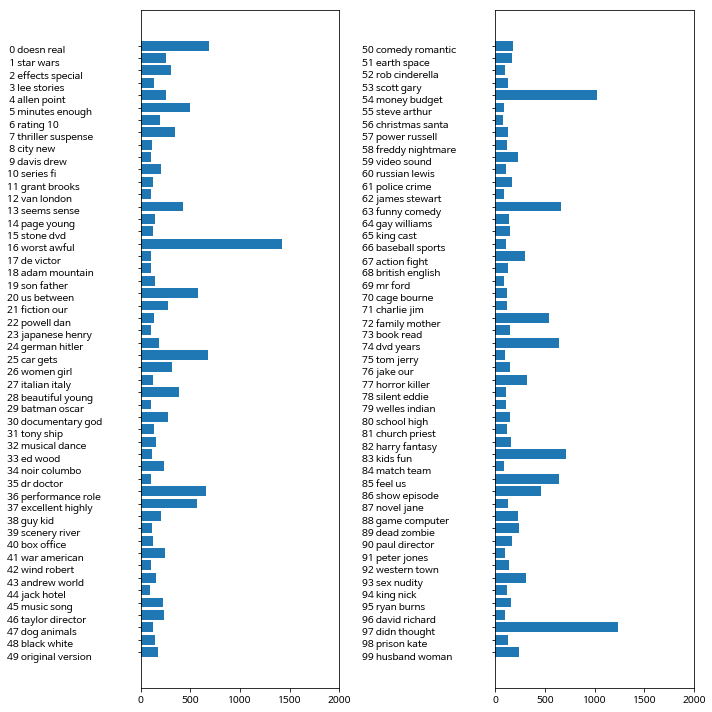

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 열이 두 개인 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

- LDA로 장르와 점수라는 두 종류의 큰 토픽과 어디에도 속하지 않은 토픽을 찾게 됨
- LDA와 같은 토픽 모델은 레이블이 없거나, 있더라도 큰 규모의 텍스트 말뭉치를 해석하는 데 좋은 방법임
- LDA는 확률적 알고리즘이므로 random_state 매개변수를 바꾸면 결과가 많이 달라짐
- 비지도 학습에서 내린 결론은 보수적으로 평가해야 하므로 직관적인 검증이 중요
- LDA.transform 메서드에서 만든 토픽이 지도 학습을 위한 압축된 표현으로 사용될 수도 있음, 훈련 샘플이 적을 때 유용

## 7.10 요약 및 정리

- 스팸이나 부정거래 탐지, 감성 분석에서 BOW 표현은 간단하면서도 강력한 해법
- 자연어와 텍스트 처리
    - 『Natural Language Processing with Python』(오라일리, 2009)
    - 『Introduction to Information Retrieval』(케임브리지 대학교, 2008)
    - http://nlp.stanford.edu/IR-book/
    - 두 책 모두 온라인에서 무료

- CountVectorizer, TfidfVectorizer
- spacy(비교적 최근), nltk(기능 풍부), gensim(토픽 모델링 강점)
- 신경망 관련 word2vec
    - 「Distributed Representations of Words and Phrases and Their Compositionality」
    - https://goo.gl/V3mTpj

- 순환 신경망(RNN) 적용